In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score, precision_score
import pandas as pd
import numpy as np
# read dataset
data = pd.read_csv('./data.csv')

# determine target and other features
y = data['Adj Close']
X = data.drop(columns=['Adj Close', 'Date', 'Open', 'Close', 'Low', 'High']) 

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit model and predict
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)
y_pred = knn_reg.predict(X_test_scaled)

# calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# calculate percent change for binary classification
y_test_pct = (y_test.shift(1) - y_test) / y_test.shift(1)
y_pred_pct = (y_pred - y_test) / y_test

# convert to binary based on direction (up/down)
y_test_binary = (y_test_pct > 0).astype(int)
y_pred_binary = (y_pred_pct > 0).astype(int)

# calculate classification metrics
f1 = f1_score(y_test_binary[1:], y_pred_binary[1:])  # skip first row due to shift
recall = recall_score(y_test_binary[1:], y_pred_binary[1:])
precision = precision_score(y_test_binary[1:], y_pred_binary[1:])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")


MAE: 2.1242
MSE: 7.2968
R2: 0.9766


In [14]:
print(f"F1: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

F1: 0.6180
Recall: 0.6250
Precision: 0.6111


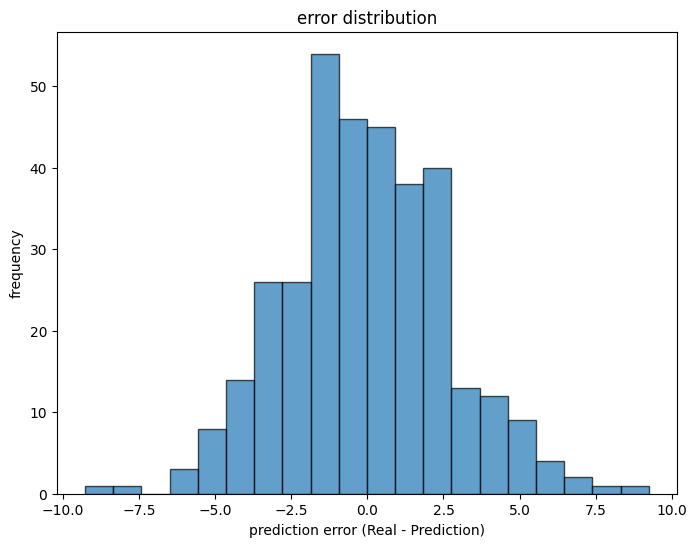

In [8]:
import matplotlib.pyplot as plt
# Error calculation
residuals = y_test - y_pred

# Histogram: Error distribution
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel("prediction error (Real - Prediction)")
plt.ylabel("frequency")
plt.title("error distribution")
plt.show()

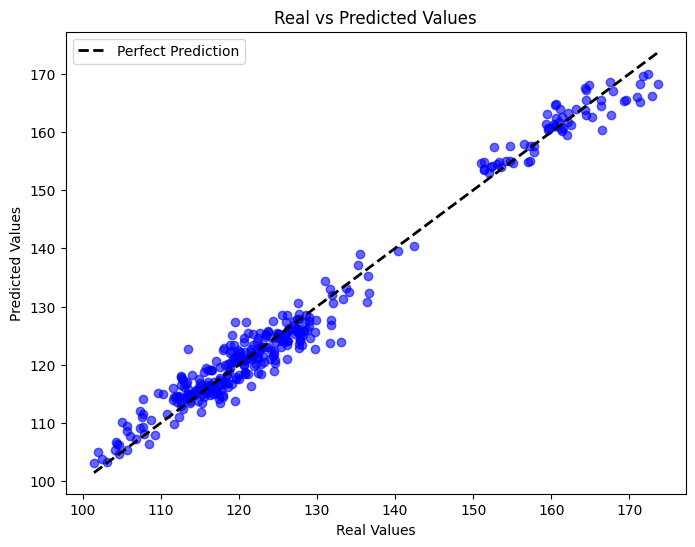

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted Values")
plt.legend()
plt.show()


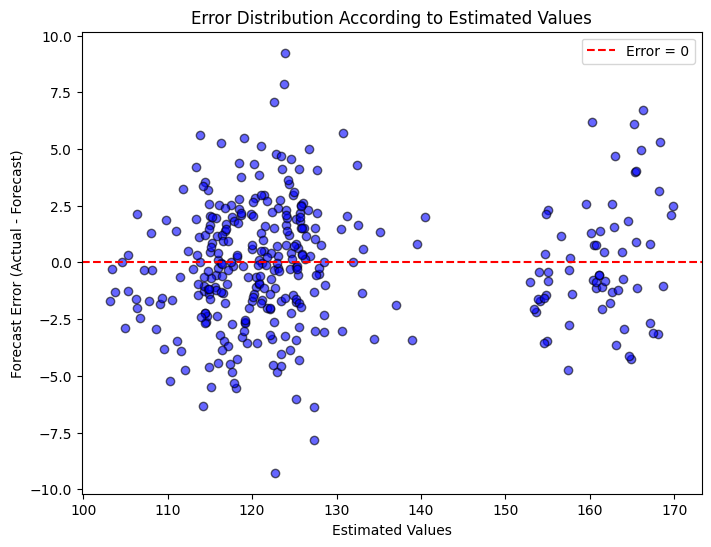

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', label='Error = 0')
plt.xlabel("Estimated Values")
plt.ylabel("Forecast Error (Actual - Forecast)")
plt.title("Error Distribution According to Estimated Values")
plt.legend()
plt.show()
